# Data Illustration

/var/folders/zr/h_4389yx0t372wtwlt21sddw0000gn/T/ipykernel_78764/2254925503.py:57: MatplotlibDeprecationWarning: The w_xaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use xaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/zr/h_4389yx0t372wtwlt21sddw0000gn/T/ipykernel_78764/2254925503.py:57: MatplotlibDeprecationWarning: The w_yaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use yaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))
/var/folders/zr/h_4389yx0t372wtwlt21sddw0000gn/T/ipykernel_78764/2254925503.py:57: MatplotlibDeprecationWarning: The w_zaxis attribute was deprecated in Matplotlib 3.1 and will be removed in 3.8. Use zaxis instead.
  ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_yaxis.se

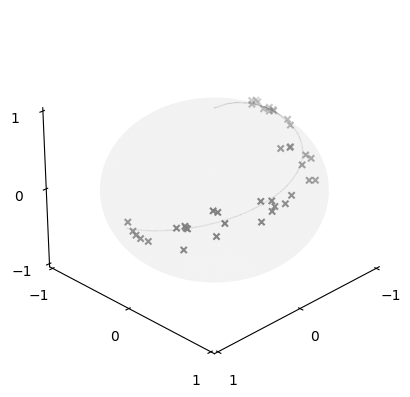

In [3]:
%matplotlib inline

import sys, os; sys.path.append(os.path.dirname(os.getcwd())) 

import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from pyfrechet.metric_spaces import *

import seaborn as sns
# sns.set_style("whitegrid")

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


def m(z):
    dz = np.sqrt(1 - z**2)
    pz = np.pi * z
    y= np.c_[dz * np.cos(pz), dz * np.sin(pz), z]
    return y


def plot_some_data(N, ax):
    M = Sphere(2)
    def add_noise(x, sig):
        v = sig * np.random.normal(size=(M.manifold.dim+1,))
        pvx = v - np.dot(x, v) * x
        return M.manifold.metric.exp(pvx, x)
    mx = m(np.random.rand(N))
    y = 1.04*np.array([ add_noise(mx[i,:], 0.1) for i in range(N)])
    ax.scatter(y[:,0], y[:,1], y[:,2], depthshade=True, color='grey', marker='x')

# Make data for the sphere
u = np.linspace(0, 2 * np.pi, 100)
v = np.linspace(0, np.pi, 100)
x = np.outer(np.cos(u), np.sin(v))
y = np.outer(np.sin(u), np.sin(v))
z = np.outer(np.ones(np.size(u)), np.cos(v))

# Plot the sphere
ax.plot_surface(x, y, z, edgecolor='none', color=(0.95,0.95,0.95), alpha=0.75, shade=False)

# make a dataset
P = 1.04*m(np.linspace(0,1,100))
# ax.scatter(P[:,0], P[:,1], P[:,2], depthshade=True, color='black', s=10)
ax.plot(P[:,0], P[:,1], P[:,2], color='black', linewidth=1)

plot_some_data(40, ax)

ax.view_init(27, 45)

ax.margins(x=0,y=0, tight=True)
ax.set_facecolor('white')

# Set color of pane edges to white
ax.w_xaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_yaxis.set_pane_color((1.0, 1.0, 1.0, 1.0));ax.w_zaxis.set_pane_color((1.0, 1.0, 1.0, 1.0))

# Set color of the grid lines
ax.w_xaxis.line.set_color((0.0, 0.0, 0.0, 1.0)); ax.w_yaxis.line.set_color((0.0, 0.0, 0.0, 1.0)); ax.w_zaxis.line.set_color((0.0, 0.0, 0.0, 1.0))
ax.set_xticks([-1, 0, 1]); ax.set_yticks([-1, 0, 1]); ax.set_zticks([-1, 0, 1])
ax.set_xlim(-1, 1); ax.set_ylim(-1, 1); ax.set_zlim(-1, 1)
ax.grid(False)

plt.savefig('../plots/sample_sphere.pdf')

# Simulation results

In [ ]:
%load_ext autoreload
%autoreload 2

import pandas as pd
import json

OUT_FILE = '../benchmark_results/20230619-result_sphere.json'

def load_data(path):
    with open(path, 'r') as f:
        results = json.load(f)
    df = pd.DataFrame(results, columns=['method', 'N', 'p', 'duration', 'dist_duration', 'err'])
    df['group'] ='p=' + df['p'].astype(str) +  ', N=' + df['N'].astype(str)
    df['fitting_duration'] = df['duration'] - df['dist_duration']
    return df

df = load_data(OUT_FILE)

In [ ]:
from plot_bench import *
forest_df = make_forest_df(df)
plot_forest_df(forest_df)
plt.savefig("../plots/runtime_sphere.pdf")

In [ ]:
from plot_bench import *
plot_errors(df[df.N > 50])
plt.savefig("../plots/error_sphere.pdf")